In [1]:
import numpy as np
import HindiCharts as hc
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import seaborn as sns

In [2]:
sentences = []
df_words = pd.DataFrame(columns=['word', 'frequency'])
df_monograms = pd.DataFrame(columns=['monogram', 'frequency'])
df_digrams = pd.DataFrame(columns=['digram', 'frequency'])
df_triagrams = pd.DataFrame(columns=['triagram', 'frequency'])
df_endings = pd.DataFrame(columns=['ending', 'frequency'])
df_vyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
df_matra = pd.DataFrame(columns=['matra', 'frequency'])
df_halfLetters = pd.DataFrame(columns=['halfLetter', 'frequency'])

In [3]:
print(hc.vyanjans)

['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह']


In [4]:
vyanjanCol = np.array(hc.vyanjans)
vyanjanFreq = np.zeros(len(vyanjanCol), dtype=float)

df_vyanjan['vyanjan'] = vyanjanCol
df_vyanjan['frequency'] = vyanjanFreq

print(df_vyanjan)

   vyanjan  frequency
0        क        0.0
1        ख        0.0
2        ग        0.0
3        घ        0.0
4        ङ        0.0
5        च        0.0
6        छ        0.0
7        ज        0.0
8        झ        0.0
9        ञ        0.0
10       ट        0.0
11       ठ        0.0
12       ड        0.0
13       ढ        0.0
14       ण        0.0
15       त        0.0
16       थ        0.0
17       द        0.0
18       ध        0.0
19       न        0.0
20       प        0.0
21       फ        0.0
22       ब        0.0
23       भ        0.0
24       म        0.0
25       य        0.0
26       र        0.0
27       ल        0.0
28       व        0.0
29       श        0.0
30       ष        0.0
31       स        0.0
32       ह        0.0


In [5]:
matraCol = np.array(hc.matras)
matraFreq = np.zeros(len(matraCol), dtype=float)

df_matra['matra'] = matraCol
df_matra['frequency'] = matraFreq

print(df_matra)



   matra  frequency
0      ा        0.0
1      ि        0.0
2      ी        0.0
3      ु        0.0
4      ू        0.0
5      े        0.0
6      ै        0.0
7      ो        0.0
8      ौ        0.0
9      ं        0.0
10     ः        0.0
11     ँ        0.0
12     ृ        0.0


In [6]:
def InsertOrIncrease(df, type,word):
    if df[type].isin([word]).any():
        df.loc[df[type] == word, 'frequency'] += 1
    else:
        df.loc[len(df)] = [word, 1]

In [7]:
def generateCSV(df, name):
    df['frequency']=df['frequency']*100 / df['frequency'].sum()
    pd.options.display.float_format = '{:.5f}'.format

    df.to_csv(name, index=False)

In [8]:
with open('input.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        for i in range(len(word)):
            df_vyanjan.loc[df_vyanjan['vyanjan'] == word[i], 'frequency'] += 1
            df_matra.loc[df_matra['matra'] == word[i], 'frequency'] += 1

            if(word[i]=='्'):
                # print(f'Half letter {word[i-1]}{word[i]} detected in {word}')
                InsertOrIncrease(df_halfLetters, 'halfLetter',word[i-1]+word[i])
                
        if len(word) ==1:
            InsertOrIncrease(df_monograms, 'monogram',word)
        
        if len(word) ==2:
            InsertOrIncrease(df_digrams, 'digram',word) 
            
        if len(word) ==3:
            InsertOrIncrease(df_triagrams, 'triagram',word)
        
        if word[-1]=='।':
            InsertOrIncrease(df_endings, 'ending',word[:-1])
        
        
generateCSV(df_vyanjan, 'vyanjan.csv')

generateCSV(df_matra, 'matra.csv')

generateCSV(df_monograms, 'monograms.csv')

generateCSV(df_digrams, 'digrams.csv')

generateCSV(df_triagrams, 'triagrams.csv')

generateCSV(df_endings, 'endings.csv')

generateCSV(df_halfLetters, 'halfLetters.csv')



Number of words: 4702


<AxesSubplot: xlabel='vyanjan', ylabel='frequency'>

C:\Users\rudra\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  func(*args, **kwargs)
C:\Users\rudra\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
C:\Users\rudra\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from current font.
  func(*args, **kwargs)
C:\Users\rudra\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  func(*args, **kwargs)
C:\Users\rudra\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from current font.
  func(*args, **kwargs)
C:\Users\rudra\AppData\Roaming\Python\Python311\s

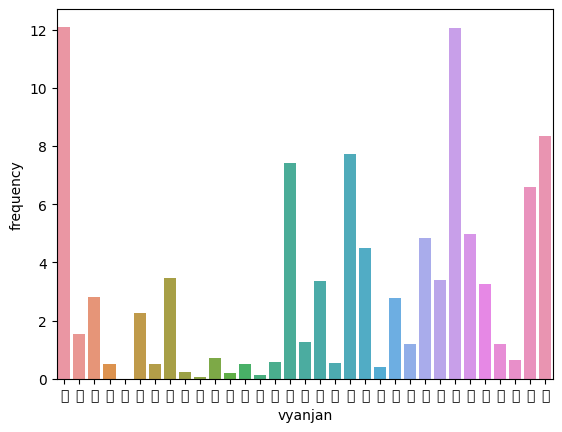

In [9]:
sns.barplot(x='vyanjan', y='frequency', data=df_vyanjan)

In [10]:
print(f'Number of vyanjans: {len(hc.vyanjans)}')
print(f'Number of matras: {len(hc.matras)}')

Number of vyanjans: 33
Number of matras: 13


In [11]:
SubstitutionMatrixVyanjan = {
    'क': 'घ', 'ख': 'घ', 'ग': 'च', 'घ': 'छ', 'ङ': 'ज', 
    'च': 'झ', 'छ': 'ञ', 'ज': 'ट', 'झ': 'ठ', 'ञ': 'ड', 
    'ट': 'ढ', 'ठ': 'ण', 'ड': 'त', 'ढ': 'थ', 'ण': 'द', 
    'त': 'ध', 'थ': 'न', 'द': 'प', 'ध': 'फ', 'न': 'ब', 
    'प': 'भ', 'फ': 'म', 'ब': 'य', 'भ': 'र', 'म': 'ल', 
    'य': 'व', 'र': 'श', 'ल': 'ष', 'व': 'स', 
    'श': 'ह', 'ष': 'क', 'स': 'ख', 'ह': 'ग'
}

SubstitutionMatrixSwar = {
    'अ': 'ई', 'आ': 'उ', 'इ': 'ऊ', 'ई': 'ए', 'उ': 'ऐ', 'ऊ': 'ओ', 'ए': 'औ', 'ऐ': 'अ', 'ओ': 'आ', 'औ': 'इ',
}

SubstitutionMatrixMatra = {
    'ा': 'ी', 'ि': 'ु', 'ी': 'ू', 'ु': 'े', 'ू': 'ै', 'े': 'ो', 'ै': 'ौ', 'ो': 'ा', 'ौ': 'ि'
}


In [12]:
CipherText= []
PlainText = []

with open('PlainTextinput.txt',encoding='utf-8') as f:
    sentence=f.read()
    
    words = sentence.split()
    print(f'Number of words: {len(words)}')
    
    for word in words:
        PlainText.append(word)
        ogword = word

        for i in range(len(word)):
            if word[i] in SubstitutionMatrixVyanjan:
                word = word.replace(word[i], SubstitutionMatrixVyanjan[word[i]])
            if word[i] in SubstitutionMatrixMatra:
                word = word.replace(word[i], SubstitutionMatrixMatra[word[i]])
            if word[i] in SubstitutionMatrixSwar:
                word = word.replace(word[i], SubstitutionMatrixSwar[word[i]])
        print(f'{ogword} -> {word}')
        CipherText.append(word)

print(PlainText)
print(CipherText)


Number of words: 14
उस -> ऐख
टापू -> ढीभै
की -> घू
राजकुमारी -> हैटघेलैहै
विजेता -> सुटोधी
चन्द्रसेन -> झय्प्शखोय
को -> घा
उस -> ऐख
टापू -> ढीभै
का -> घी
राजा -> शूटू
घोषित -> छाकुध
करती -> घशधू
हैं। -> गौं।
['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।']
['ऐख', 'ढीभै', 'घू', 'हैटघेलैहै', 'सुटोधी', 'झय्प्शखोय', 'घा', 'ऐख', 'ढीभै', 'घी', 'शूटू', 'छाकुध', 'घशधू', 'गौं।']


In [13]:
attempt = []

for i in range(len(PlainText)):
    str=""
    for j in range(len(PlainText[i])):
        # print(f'{PlainText[i][j]} is {hc.LetterType[PlainText[i][j]]}')
        str=str+hc.LetterType[PlainText[i][j]][0]
    attempt.append(str)

print(attempt)


        

['sv', 'vmvm', 'vm', 'vmvvmvmvm', 'vmvmvm', 'vvhvhvvmv', 'vm', 'sv', 'vmvm', 'vm', 'vmvm', 'vmvmv', 'vvvm', 'vmmv']


In [14]:
df_Cvyanjan = pd.DataFrame(columns=['vyanjan', 'frequency'])
df_Cswar = pd.DataFrame(columns=['swar', 'frequency'])
df_Cmatra = pd.DataFrame(columns=['matra', 'frequency'])

for i in range(len(CipherText)):
    for letter in CipherText[i]:
        if letter in hc.vyanjans:
            InsertOrIncrease(df_Cvyanjan, 'vyanjan',letter)
        if letter in hc.swars:
            InsertOrIncrease(df_Cswar, 'swar',letter)
        if letter in hc.matras:
            InsertOrIncrease(df_Cmatra, 'matra',letter)
            
generateCSV(df_Cvyanjan, 'Cvyanjan.csv')
generateCSV(df_Cswar, 'Cswar.csv')
generateCSV(df_Cmatra, 'Cmatra.csv')

In [15]:
attemptedDecryption = []

for word in CipherText:
    attemptedDecryption.append(word)
    
print(attemptedDecryption)

for i in range(len(attemptedDecryption)):
    print(f'{PlainText[i]} -> {attemptedDecryption[i]}')

['ऐख', 'ढीभै', 'घू', 'हैटघेलैहै', 'सुटोधी', 'झय्प्शखोय', 'घा', 'ऐख', 'ढीभै', 'घी', 'शूटू', 'छाकुध', 'घशधू', 'गौं।']
उस -> ऐख
टापू -> ढीभै
की -> घू
राजकुमारी -> हैटघेलैहै
विजेता -> सुटोधी
चन्द्रसेन -> झय्प्शखोय
को -> घा
उस -> ऐख
टापू -> ढीभै
का -> घी
राजा -> शूटू
घोषित -> छाकुध
करती -> घशधू
हैं। -> गौं।


In [16]:
df_matra = df_matra.sort_values(by=['frequency'], ascending=False)
df_Cmatra = df_Cmatra.sort_values(by=['frequency'], ascending=False)

for word in CipherText:
    for i in range(len(word)):
        if word[i] in df_Cmatra['matra'].values:
            word = word.replace(word[i], df_matra['matra'].values[df_Cmatra['matra'].values.tolist().index(word[i])])
    print(word)

ऐख
ढेभा
घी
हूटघुलूहू
सिटोधे
झय्प्शखोय
घं
ऐख
ढेभा
घे
शेटे
छंकिध
घशधी
गैू।


In [17]:
print(PlainText)

['उस', 'टापू', 'की', 'राजकुमारी', 'विजेता', 'चन्द्रसेन', 'को', 'उस', 'टापू', 'का', 'राजा', 'घोषित', 'करती', 'हैं।']
